# Sales Data Analysis

In this project, we will analyze and perform EDA on a sales analysis data set.

In [1]:
# Importing relevant libraries 
import pandas as pd
# import numpy as pd
import os
import glob
import os
import numpy as np
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex7 import *

In [2]:
# checking path of csv files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/ssales/Sales_August_2019.csv
/kaggle/input/ssales/Sales_May_2019.csv
/kaggle/input/ssales/Sales_February_2019.csv
/kaggle/input/ssales/Sales_November_2019.csv
/kaggle/input/ssales/Sales_January_2019.csv
/kaggle/input/ssales/Sales_March_2019.csv
/kaggle/input/ssales/Sales_September_2019.csv
/kaggle/input/ssales/Sales_April_2019.csv
/kaggle/input/ssales/Sales_July_2019.csv
/kaggle/input/ssales/Sales_October_2019.csv
/kaggle/input/ssales/Sales_June_2019.csv
/kaggle/input/ssales/Sales_December_2019.csv


In [3]:
# Merging 12 months of sales data into a single file

def merge_files(path):
    csv_files = glob.glob('/kaggle/input/ssales/*.csv')
    lst_dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        lst_dataframes.append(df)

    combined_df = pd.concat(lst_dataframes, ignore_index=True)    
    return combined_df
path_to_kaggle = '/kaggle/input/ssales/*.csv'

combined_df = merge_files(path_to_kaggle)
combined_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"


In [4]:
# extracting month from the date column and adding month column
combined_df['Month'] = combined_df['Order Date'].str[:2]
# combined_df['Month'] = pd.to_datetime(combined_df['Month']).dt.month
combined_df.head()
# combined_df['Month'] = pd.to_datetime(combined_df['Order Date']).dt.month
# combined_df['Month'].tail(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


In [5]:
# Drop rows of NAN
nan_df = combined_df[combined_df.isna().any(axis=1)]
display(nan_df.head())

combined_df = combined_df.dropna(how='all')
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


Here's some of the code you've written so far. Start by running it again.

In [6]:
# How much money was earned that month and what was the best sales@

# extracting month from the date column and adding month column
# combined_df['date'] = 



In [7]:
combined_df = combined_df[combined_df['Order Date'].str[0:2]!='Or']
combined_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08


In [8]:
# correct columns to the correct type

combined_df['Quantity Ordered'] = combined_df['Quantity Ordered'].astype(int)# int
combined_df['Price Each'] = combined_df['Price Each'].astype(float) # Float
combined_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08


In [9]:
# Add a sales column

combined_df['sales'] = combined_df['Quantity Ordered']*combined_df['Price Each']

# best sales value and month for sales
max_sales = max(combined_df['sales'])
combined_df.groupby('Month').sum()

# 12 month is the best sales month

,Quantity Ordered,Price Each,sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


range(1, 13)


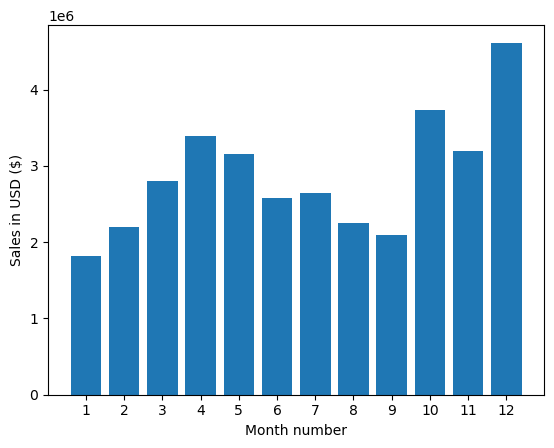

In [10]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,combined_df.groupby(['Month']).sum()['sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [11]:
combined_df.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68


In [12]:
# which city has the highest number of sales
# add a city column

combined_df['city'] = combined_df['Purchase Address'].str.split(',')
combined_df['city'] =  combined_df['city'].str.get(1)
combined_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland


In [13]:
# historgram for which city has the best sales

import matplotlib.pyplot as plt

# city = range(1,13)
# print(months)

sales_sum = combined_df.groupby(['city']).sum()

In [14]:
sales_sum = sales_sum.reset_index()

In [15]:
sales_sum

,city,Quantity Ordered,Price Each,sales
0,Atlanta,16602,2779908.20,2795498.58
1,Austin,11153,1809873.61,1819581.75
2,Boston,22528,3637409.77,3661642.01
3,Dallas,16730,2752627.82,2767975.40
4,Los Angeles,33289,5421435.23,5452570.80
5,New York City,27932,4635370.83,4664317.43
6,Portland,14053,2307747.47,2320490.61
7,San Francisco,50239,8211461.74,8262203.91
8,Seattle,16553,2733296.01,2747755.48


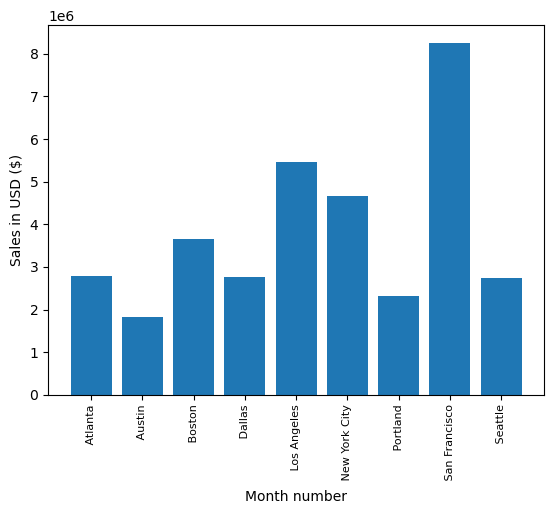

In [16]:
# creating bar chart for city and the sales for each city
# keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(sales_sum['city'],sales_sum['sales'])
plt.xticks(sales_sum['city'], rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

# import matplotlib.pyplot as plt

# # keys = [city for city, df in all_data.groupby(['City'])]

# plt.bar(sales_sum['city'],sales_sum['sales'])
# plt.ylabel('Sales in USD ($)')
# plt.xlabel('Month number')
# plt.xticks(keys, rotation='vertical', size=8)
# plt.show()

In [17]:
#Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

combined_df['my_datetime_col'] = pd.to_datetime(combined_df['Order Date'])

# extract date and time into separate columns
combined_df['date'] = combined_df['my_datetime_col'].dt.date
combined_df['time'] = combined_df['my_datetime_col'].dt.time

In [18]:
combined_df['hour'] = combined_df['my_datetime_col'].dt.hour
# combined-df['minutes'] =  combined_df['my_datetime_col'].dt.minutes

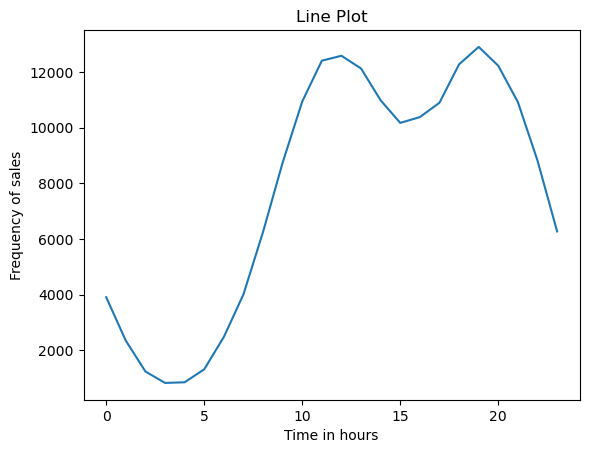

In [19]:
##What time should we display advertisemens to maximize the likelihood of customer’s buying product?

hour_df = combined_df.groupby(['hour']).count()
hour_df = hour_df.reset_index()

# create a line plot
plt.plot(hour_df['hour'], hour_df['sales'])

# add labels and title
plt.xlabel('Time in hours')
plt.ylabel('Frequency of sales')
plt.title('Line Plot')

# display the plot
plt.show()

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*